In [61]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [62]:
# pip install tensorflow

In [63]:
BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 10

In [64]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory='C:\\Users\\vassh\\OneDrive\\Desktop\\potato\\PlantVillage',
        seed=123,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )

Found 2563 files belonging to 13 classes.


In [67]:
len(class_names)

13

In [68]:
class_names = dataset.class_names
class_names

['Maize___Blight',
 'Maize___Common_Rust',
 'Maize___Gray_Leaf_Spot',
 'Maize___Healthy',
 'Rice___Bacterial leaf blight',
 'Rice___Brown spot',
 'Rice___Leaf smut',
 'Soybean___Caterpillar',
 'Soybean___Diabrotica_speciosa',
 'Soybean___Healthy',
 'Wheat__Healthy',
 'Wheat__Septoria',
 'Wheat__stripe_rust']

In [69]:
for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (32, 255, 255, 3)
Single Image :  tf.Tensor(
[[[110.617645 137.61765  104.79412 ]
  [120.17647  146.38235  117.23529 ]
  [132.9706   156.52942  134.29411 ]
  ...
  [201.32349  200.35303  149.55884 ]
  [197.79404  206.6766   150.      ]
  [194.26468  208.91177  150.      ]]

 [[108.97059  135.97058  103.147064]
  [118.31142  144.5173   115.37024 ]
  [130.50002  154.05884  131.82353 ]
  ...
  [200.86327  199.06927  150.38237 ]
  [197.57607  206.24066  151.4291  ]
  [195.01555  209.66264  152.39793 ]]

 [[107.20588  132.79411  100.676476]
  [116.31315  141.48097  112.47924 ]
  [127.85294  151.72319  128.07613 ]
  ...
  [199.66429  198.71112  152.90483 ]
  [196.63664  204.92232  153.14708 ]
  [195.11418  209.69899  154.32353 ]]

 ...

 [[191.44118  186.19896  158.00345 ]
  [187.72491  183.20589  154.20589 ]
  [183.67647  179.67647  150.67647 ]
  ...
  [244.67128  242.16437  234.37718 ]
  [244.109    243.33221  236.16786 ]
  [244.       243.70589  236.58823 ]]

 [[190.3

In [71]:
len(dataset)

81

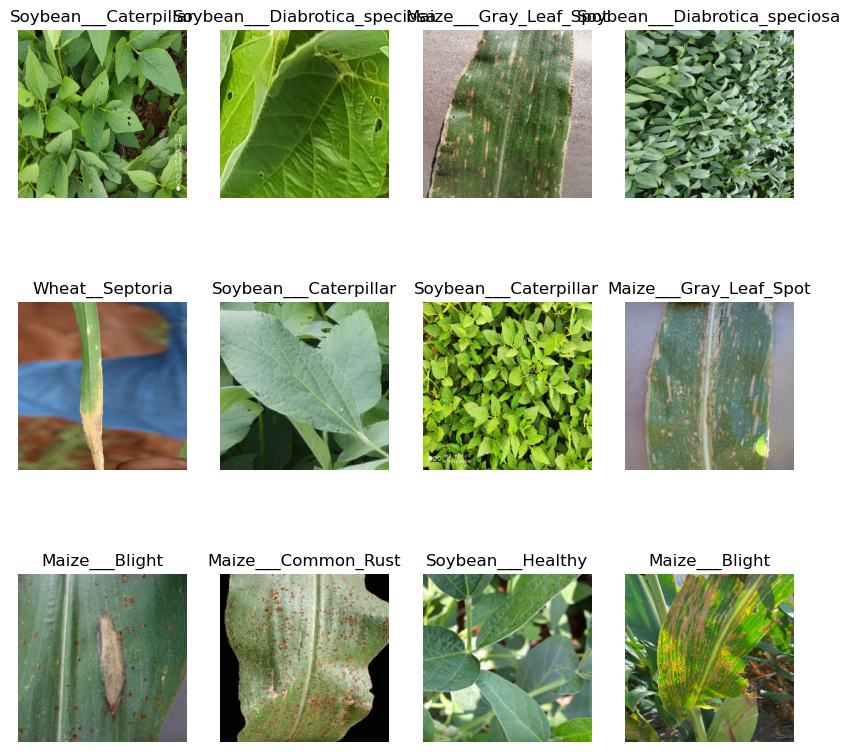

In [72]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [82]:
len(dataset)

81

In [83]:
train_size = 0.8
len(dataset) * train_size

64.8

In [84]:
train_ds = dataset.take(64)
len(train_ds)

64

In [85]:
test_ds = dataset.skip(64)
len(test_ds)

17

In [86]:
val_size = 0.1
len(dataset) * val_size

8.1

In [88]:
val_ds = test_ds.take(8)
len(val_ds)

8

In [89]:
test_ds = test_ds.skip(8)
len(test_ds)

9

In [91]:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [92]:
len(train_ds)

64

In [93]:
len(val_ds)

8

In [94]:
len(test_ds)

9

In [95]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [96]:
#changed

import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Define your image size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize the images
    layers.Rescaling(1./255),  # Normalize the images
])

# Example of how to use it in a model
model = tf.keras.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])


In [97]:
#changed

import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Flip images randomly
    layers.RandomRotation(0.2),  # Rotate images randomly by up to 20%
])


In [98]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [104]:
# train_ds

In [100]:
#changed

import tensorflow as tf
from tensorflow.keras import layers, models

IMAGE_SIZE = 224  # Replace with your image size
CHANNEL = 3  # Typically 3 for RGB images
BATCH_SIZE = 32  # Or any batch size you want
n_classes = 13  # Number of classes

# Your resize and rescale layer (already defined earlier)
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

# Build the model with Input layer at the beginning
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL)),  # Define input shape here
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# No need to call model.build() explicitly


In [101]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,109 (672.30 KB)

 Trainable params: 172,109 (672.30 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [103]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 378ms/step - accuracy: 0.1243 - loss: 2.4616 - val_accuracy: 0.2930 - val_loss: 2.0144
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step - accuracy: 0.3014 - loss: 1.9272 - val_accuracy: 0.3750 - val_loss: 1.6513
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.3374 - loss: 1.7286 - val_accuracy: 0.3633 - val_loss: 1.6172
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.4002 - loss: 1.5721 - val_accuracy: 0.4727 - val_loss: 1.3452
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 350ms/step - accuracy: 0.4972 - loss: 1.3251 - val_accuracy: 0.5859 - val_loss: 1.1140
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 337ms/step - accuracy: 0.5728 - loss: 1.0964 - val_accuracy: 0.5391 - val_loss: 1.0470
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.5905 - loss: 1.0431 - val_accuracy: 0.5781 - val_loss: 1.0000
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.6374 - loss: 0.9876 - val_accu

In [105]:
scores = model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6050 - loss: 0.9282


In [106]:
model.save("model.h5")
# model.save('venv/model.h5')

In [107]:
print(history)
print(history.params)
print(history.history.keys)

{'verbose': 1, 'epochs': 10, 'steps': 64}
<built-in method keys of dict object at 0x000001F6D6662CC0>


In [108]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.355820894241333,
 1.862959861755371,
 1.6474748849868774,
 1.5068193674087524,
 1.2801306247711182]

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

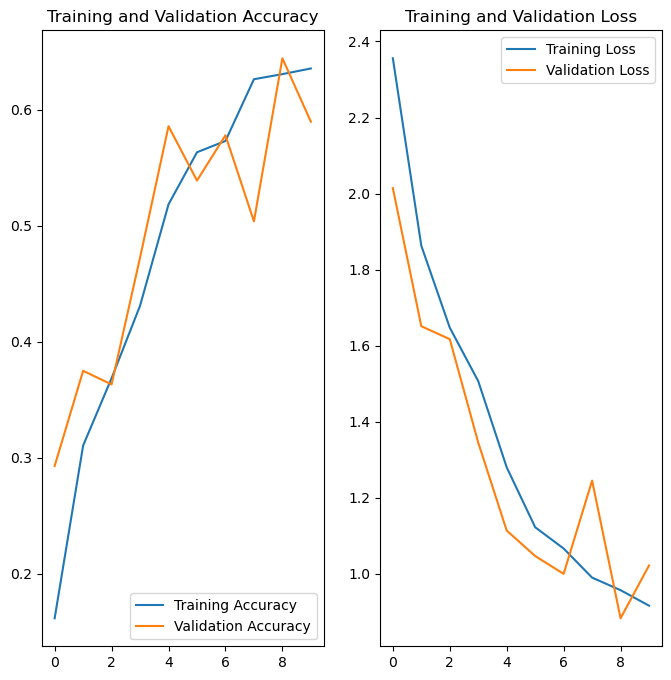

In [110]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [111]:
model = tf.keras.models.load_model('model.h5')

Maize___Blight


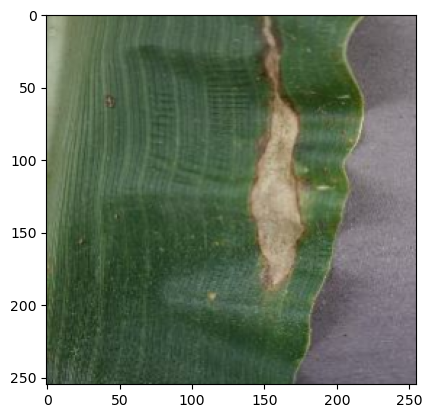

In [112]:
#healthy

import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    # pred_img = model.predict(image_batch) 

    plt.imshow(first_image)
    print(class_names[first_label])
    


    # print("first image to predict")
    # plt.imshow(first_image)
    # print("actual label:",class_names[first_label])

    # batch_prediction = model.predict(images_batch)
    # print("predicted label:",class_names[np.argmax(batch_prediction[0])])

first image to predict
actual label: Maize___Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
predicted label: Maize___Healthy


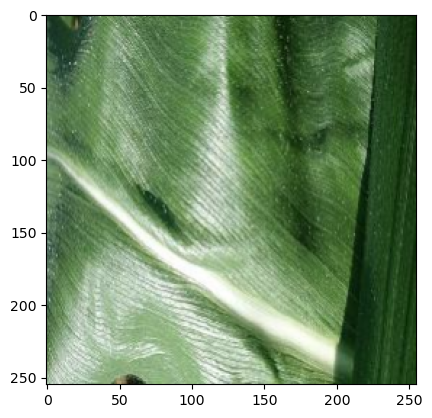

In [113]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [114]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [115]:
import tensorflow as tf

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Remove .numpy()
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = round(100 * tf.nn.softmax(predictions[0])[tf.argmax(predictions[0])].numpy(), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


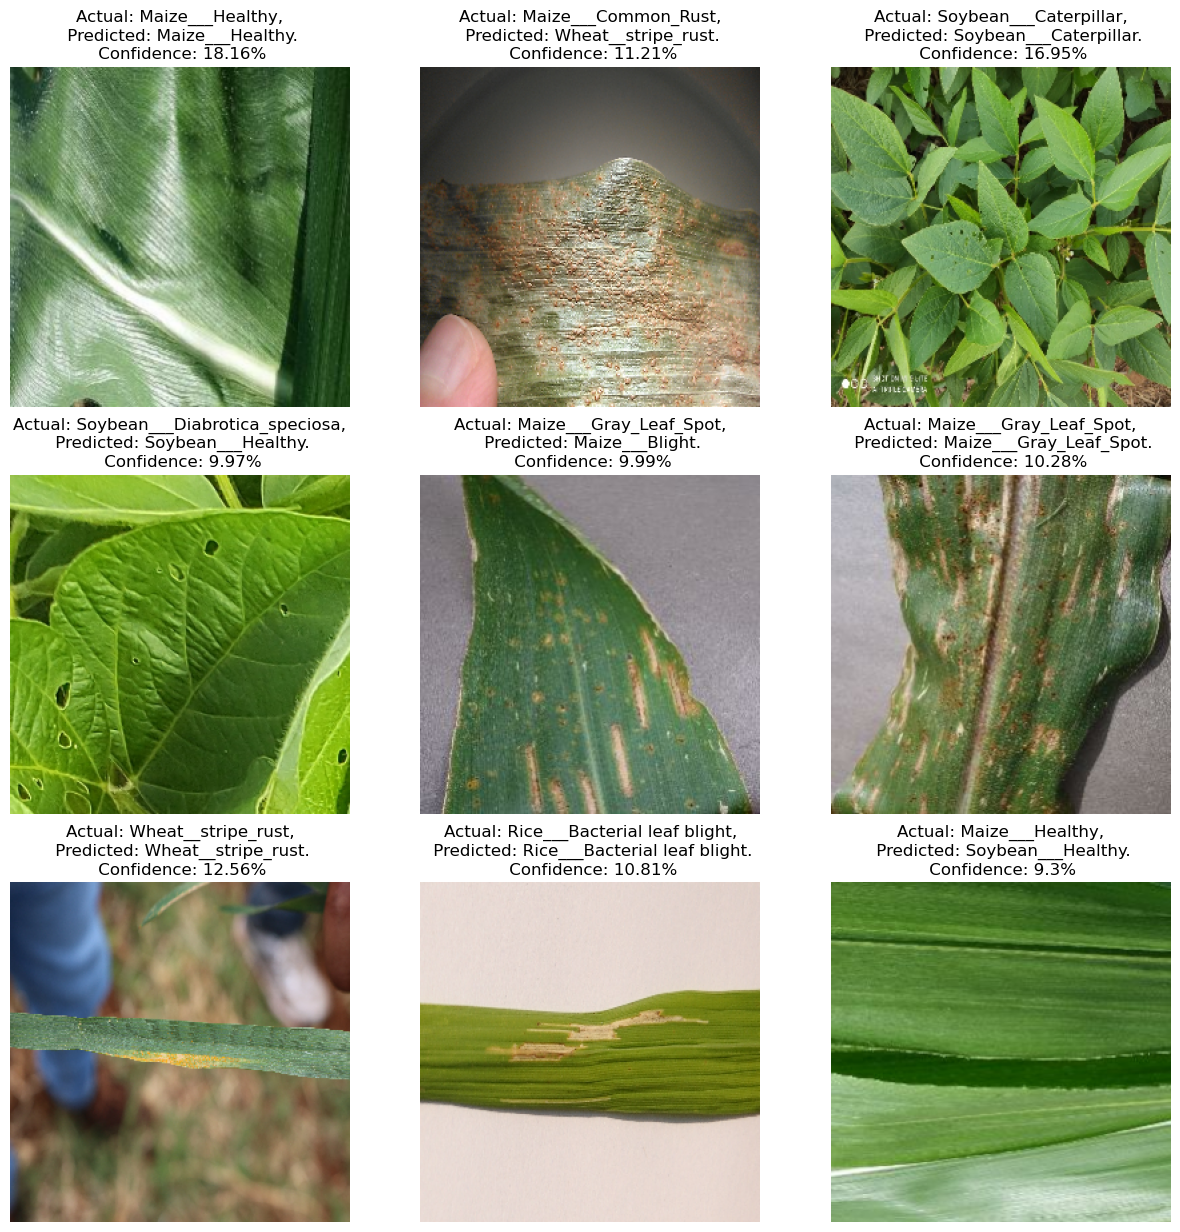

In [116]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [117]:
#pip install numpy

In [118]:
import numpy as np

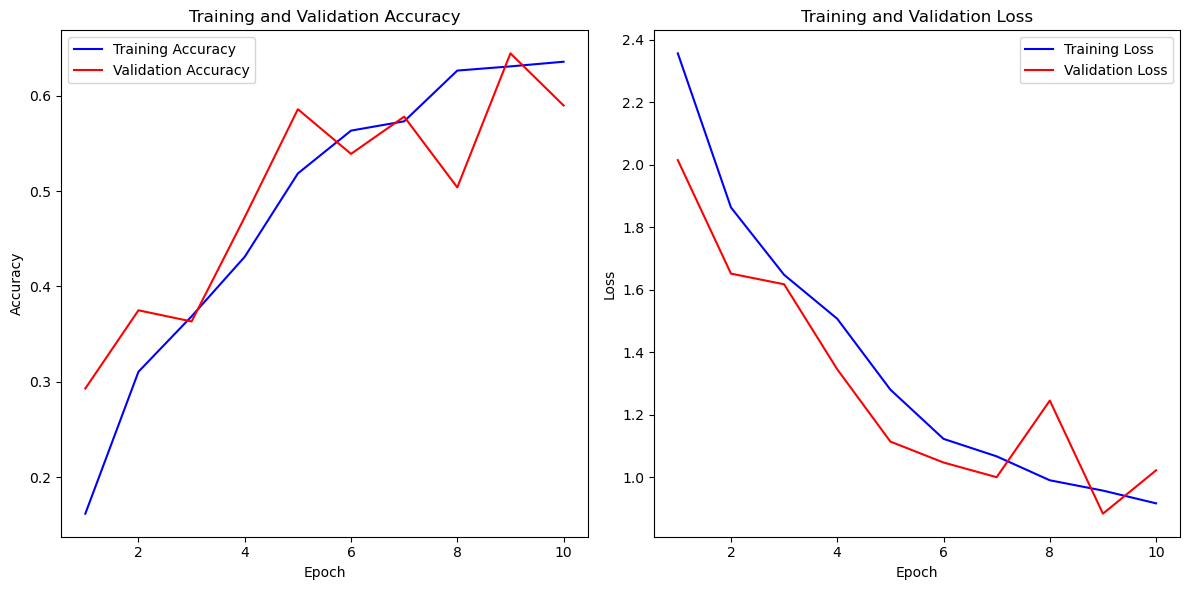

In [119]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)  # Use 'acc' for training accuracy

# Plotting accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f'Final Training Accuracy: {acc[-1] * 100:.2f}%')
print(f'Final Validation Accuracy: {val_acc[-1] * 100:.2f}%')


Final Training Accuracy: 63.57%
Final Validation Accuracy: 58.98%
